# INDIA Complete COVID-19 Study 

# Introduction

The first case of the 2019–20 coronavirus pandemic in India was reported on 30 January 2020, originating from China. Experts suggest the number of infections could be much higher as India's testing rates are among the lowest in the world. The infection rate of COVID-19 in India is reported to be 1.7, significantly lower than in the worst affected countries.

The outbreak has been declared an epidemic in more than a dozen states and union territories, where provisions of the Epidemic Diseases Act, 1897 have been invoked, and educational institutions and many commercial establishments have been shut down. India has suspended all tourist visas, as a majority of the confirmed cases were linked to other countries.

On 22 March 2020, India observed a 14-hour voluntary public curfew at the instance of the prime minister Narendra Modi. The government followed it up with lockdowns in 75 districts where COVID cases had occurred as well as all major cities. Further, on 24 March, the prime minister ordered a nationwide lockdown for 21 days, affecting the entire 1.3 billion population of India.

The World Health Organisation chief executive director of health emergencies programme Michael Ryan said that India had "tremendous capacity" to deal with the coronavirus outbreak and, as the second most populous country, will have enormous impact on the world's ability to deal with it.Other commentators worried about the economic devastation caused by the lockdown, which has huge effects on informal workers, micro and small enterprises, farmers and the self-employed, who are left with no livelihood in the absence of transportation and access to markets. The lockdown was justified by the government and other agencies for being preemptive to prevent India from entering a higher stage which could make handling very difficult and cause even more losses thereafter.

According to a study at Shiv Nadar University, India could have witnessed a surge of 31,000 cases of disease between March 24 and April 14 without lockdown.

# The Story of COVID-19 in India

# Tree plot India

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.integrate import odeint

from plotly.offline import iplot, init_notebook_mode
import math
import bokeh 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as pt
from urllib.request import urlopen
import json
from dateutil import parser
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import row, column
from bokeh.resources import INLINE
from bokeh.io import output_notebook
from bokeh.models import Span
import warnings
warnings.filterwarnings("ignore")
output_notebook(resources=INLINE)

Loading BokehJS ...

In [3]:
covid_India_cases = pd.read_csv('covid_19_india.csv')
covid_India_cases.rename(columns={'State/UnionTerritory': 'State', 'Cured': 'Recovered', 'Confirmed': 'Confirmed'}, inplace=True)

statewise_cases = pd.DataFrame(covid_India_cases.groupby(['State'])['Confirmed', 'Deaths', 'Recovered'].max().reset_index())
statewise_cases["Country"] = "India" # in order to have a single root node


In [54]:
covid_India_cases.head()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Recovered,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [44]:
statewise_cases.head()

,State,Confirmed,Deaths,Recovered
0,Andaman and Nicobar Islands,33,0,11
1,Andhra Pradesh,1097,31,231
2,Arunachal Pradesh,1,0,1
3,Assam,36,1,19
4,Bihar,251,2,46


# Time Plot

In [12]:
import IPython
IPython.display.HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1977187" data-url="https://flo.uri.sh/visualisation/1977187/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')

# Map View

In [55]:
covid_India_cases = pd.read_csv('covid19-in-india/covid_19_india.csv')
covid_India_cases.rename(columns={'State/UnionTerritory': 'State', 'Cured': 'Recovered', 'Confirmed': 'Confirmed'}, inplace=True)

statewise_cases = pd.DataFrame(covid_India_cases.groupby(['State'])['Confirmed', 'Deaths', 'Recovered'].max().reset_index())
last=statewise_cases
pos=pd.read_csv('utm-of-india/UTM ZONES of INDIA.csv')
ind_grp=last.merge(pos , left_on='State', right_on='State / Union Territory')

In [56]:
pos.head()

,State / Union Territory,Latitude,Longitude
0,Uttar Pradesh,26.8467,80.9462
1,Maharashtra,19.7515,75.7139
2,Bihar,25.0961,85.3131
3,West Bengal,22.9868,87.8550
4,Madhya Pradesh,22.9734,78.6569


In [57]:
ind_grp.head()

,State,Confirmed,Deaths,Recovered,State / Union Territory,Latitude,Longitude
0,Andaman and Nicobar Islands,33,0,11,Andaman and Nicobar Islands,11.7401,92.6586
1,Andhra Pradesh,1097,31,231,Andhra Pradesh,15.9129,79.7400
2,Arunachal Pradesh,1,0,1,Arunachal Pradesh,28.2180,94.7278
3,Assam,36,1,19,Assam,26.2006,92.9376
4,Bihar,251,2,46,Bihar,25.0961,85.3131


In [17]:
import folium
map = folium.Map(location=[20.5937, 78.9629], zoom_start=4,tiles='cartodbpositron')

for lat, lon,state,Confirmed,Recovered,Deaths in zip(ind_grp['Latitude'], ind_grp['Longitude'],ind_grp['State'],ind_grp['Confirmed'],ind_grp['Recovered'],ind_grp['Deaths']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                      popup =(
                    'State: ' + str(state) + '<br>'
                    'Confirmed: ' + str(Confirmed) + '<br>'
                      'Recovered: ' + str(Recovered) + '<br>'
                      'Deaths: ' + str(Deaths) + '<br>'),

                        fill_color='red',
                        fill_opacity=0.7 ).add_to(map)
map

In [18]:
ind_map=pd.read_csv('covid19-in-india/covid_19_india.csv')
#ind_map.head()
pos=pd.read_csv('utm-of-india/UTM ZONES of INDIA.csv')
ind_map1=ind_map.merge(pos , left_on='State/UnionTerritory', right_on='State / Union Territory')
#ind_map1.head()

In [58]:
#ind_map = ind_grp
ind_map1  = ind_map1.groupby(['Date', 'State/UnionTerritory','Latitude','Longitude'])['Confirmed'].sum()


ind_map1 = ind_map1.reset_index()
ind_map1.head()
ind_map1['size'] = ind_map1['Confirmed']*90000000
ind_map1
fig = px.scatter_mapbox(ind_map1, lat="Latitude", lon="Longitude",
                     color="Confirmed", size='size',hover_data=['State/UnionTerritory'],
                     color_continuous_scale='burgyl', animation_frame="Date", 
                     title='Spread total cases over time in India')
fig.update(layout_coloraxis_showscale=True)
fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=3, mapbox_center = {"lat":20.5937,"lon":78.9629})
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

In [24]:
import pandas as pd
import numpy as np
import datetime
import requests
import warnings

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import squarify
import plotly_express as px


from IPython.display import Image
warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
age_details = pd.read_csv('covid19-in-india/AgeGroupDetails.csv')
india_covid_19 = pd.read_csv('covid19-in-india/covid_19_india.csv')
hospital_beds = pd.read_csv('covid19-in-india/HospitalBedsIndia.csv')
individual_details = pd.read_csv('covid19-in-india/IndividualDetails.csv')
ICMR_details = pd.read_csv('covid19-in-india/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('covid19-in-india/ICMRTestingLabs.csv')
state_testing = pd.read_csv('covid19-in-india/StatewiseTestingDetails.csv')


In [29]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')

In [30]:
india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'])
state_testing['Date'] = pd.to_datetime(state_testing['Date'])

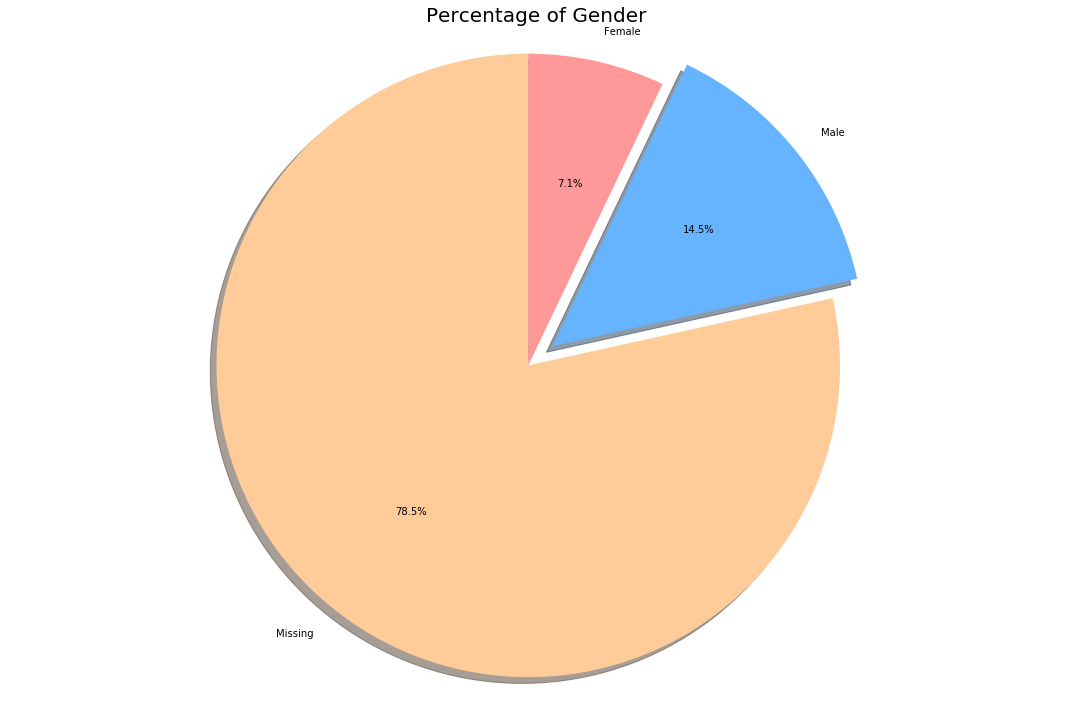

In [34]:
labels = ['Missing', 'Male', 'Female']
sizes = []
sizes.append(individual_details['gender'].isnull().sum())
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])

explode = (0, 0.1, 0)
colors = ['#ffcc99','#66b3ff','#ff9999']

plt.figure(figsize= (15,10))
plt.title('Percentage of Gender',fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.tight_layout()



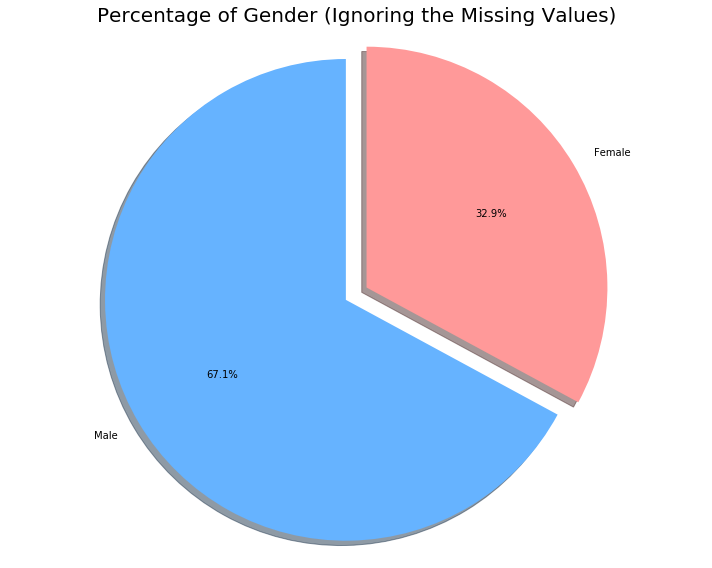

In [35]:
labels = ['Male', 'Female']
sizes = []
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])

explode = (0.1, 0)
colors = ['#66b3ff','#ff9999']

plt.figure(figsize= (10,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 20)
plt.axis('equal')
plt.tight_layout()



In [36]:
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

# INDIA-Covid-19 part-2

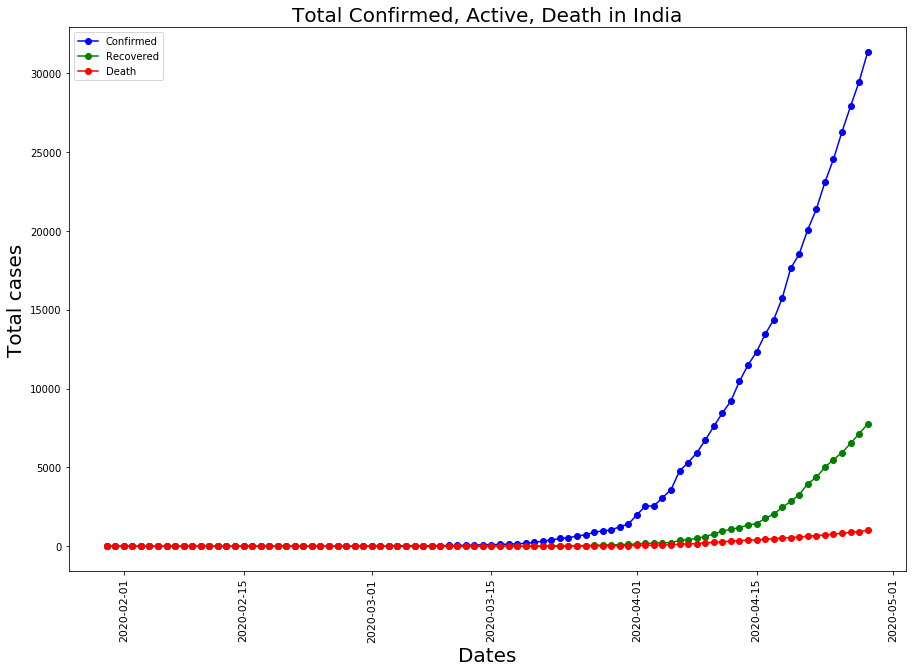

In [37]:
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend();



In [38]:
state_details = pd.pivot_table(india_covid_19, values=['Confirmed','Deaths','Cured'], index='State/UnionTerritory', aggfunc='max')
state_details['Recovery Rate'] = round(state_details['Cured'] / state_details['Confirmed'],2)
state_details['Death Rate'] = round(state_details['Deaths'] /state_details['Confirmed'], 2)
state_details = state_details.sort_values(by='Confirmed', ascending= False)
state_details.style.background_gradient(cmap='Reds')

,Confirmed,Cured,Deaths,Recovery Rate,Death Rate
State/UnionTerritory,,,,,
Maharashtra,7628,1076,323,0.14,0.04
Gujarat,3071,282,133,0.09,0.04
Delhi,2625,869,54,0.33,0.02
Madhya Pradesh,2096,210,99,0.1,0.05
Rajasthan,2083,493,33,0.24,0.02
Uttar Pradesh,1843,289,29,0.16,0.02
Tamil Nadu,1821,960,23,0.53,0.01
Andhra Pradesh,1097,231,31,0.21,0.03
Telengana,991,280,26,0.28,0.03


In [59]:
state_testing = pd.read_csv('covid19-in-india/StatewiseTestingDetails.csv')
state_testing

,Date,State,TotalSamples,Negative,Positive
0,2020-02-17,Kerala,423,406.0,3
1,2020-02-18,Kerala,425,420.0,3
2,2020-02-19,Kerala,432,423.0,3
3,2020-02-20,Kerala,433,423.0,3
4,2020-02-21,Kerala,437,426.0,3
...,...,...,...,...,...
196,2020-04-10,Odisha,3249,3201.0,48
197,2020-04-10,Punjab,3461,2972.0,151
198,2020-04-10,Rajasthan,22324,20673.0,520
199,2020-04-10,Tamil Nadu,8410,6838.0,911


In [60]:
test_total =state_testing.groupby('State').sum().sort_values('TotalSamples' , ascending = False)

In [61]:
test_total

,TotalSamples,Negative,Positive
State,,,
Kerala,199488,169771.0,5155
Maharashtra,157882,148747.0,6903
Karnataka,92661,83643.0,2298
Delhi,75460,62485.0,5441
Rajasthan,71348,66364.0,1573
Tamil Nadu,65708,50063.0,6230
Madhya Pradesh,33445,24923.0,2468
Gujarat,27140,25097.0,1275
Punjab,22844,19558.0,844


# Testings

In [40]:
testing=state_testing.groupby('State').sum().reset_index()
fig = px.bar(testing, 
             x="TotalSamples",
             y="State", 
             orientation='h',
             height=800,
             title='Testing statewise insight')
fig.show()

# Laboratory

In [41]:
import plotly.express as px
values = list(ICMR_labs['state'].value_counts())
names = list(ICMR_labs['state'].value_counts().index)
df = pd.DataFrame(list(zip(values, names)), 
               columns =['values', 'names'])

fig = px.bar(df, 
             x="values", 
             y="names", 
             orientation='h',
             height=1000,
             title='ICMR Testing Centers in each State')
fig.show()


# India COVID19 Forecasting

# Sigmoid model

I thought of a sigmoidal function because China's data resembled a sigmoidal shape. Therefore, I try to fit sigmoid functions onto India's. Its just a guess as per the graph about the cases in India.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Any results you write to the current directory are saved as output.
train=pd.read_csv('/kaggle/input/coronavirus-2019ncov/covid-19-all.csv')

In [29]:
#print("Number of Country_Region -", train['Country/Region'].nunique())
#print("Dates from", min(train['Date']), "to day", max(train['Date']), "- total of", train['Date'].nunique(), "days")
#print("Countries with Province: ", train[train['Province/State'].isna()==False]['Country/Region'].unique())
train.head(5)

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
0,China,Anhui,31.8257,117.2264,1.0,NaN,NaN,2020-01-22
1,China,Beijing,40.1824,116.4142,14.0,NaN,NaN,2020-01-22
2,China,Chongqing,30.0572,107.8740,6.0,NaN,NaN,2020-01-22
3,China,Fujian,26.0789,117.9874,1.0,NaN,NaN,2020-01-22
4,China,Gansu,37.8099,101.0583,NaN,NaN,NaN,2020-01-22


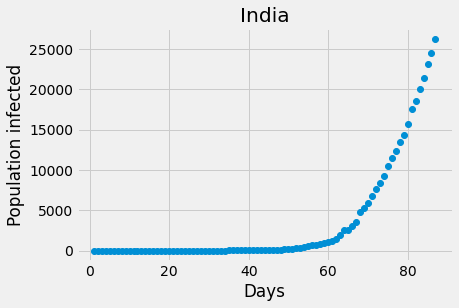

In [30]:
country_df = train[train['Country/Region']=='India'].groupby('Date')['Confirmed','Deaths'].sum()
country_df['day_count'] = list(range(1,len(country_df)+1))
ydata = country_df.Confirmed
xdata = country_df.day_count
country_df['rate'] = (country_df.Confirmed-country_df.Confirmed.shift(1))/country_df.Confirmed
country_df['increase'] = (country_df.Confirmed-country_df.Confirmed.shift(1))

plt.plot(xdata, ydata, 'o')
plt.title("India")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()

[92.63362381  1.75222064  4.22892906]


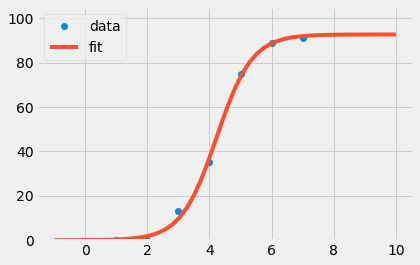

In [31]:
from scipy.optimize import curve_fit
import pylab


def sigmoid(x,c,a,b):
     y = c*1 / (1 + np.exp(-a*(x-b)))
     return y
#country_df.ConfirmedCases
#country_df.day_count
xdata = np.array([1, 2, 3,4, 5, 6, 7])
ydata = np.array([0, 0, 13, 35, 75, 89, 91])

#([low_a,low_b],[high_a,high_b])
#low x --> low b
#high y --> high c
#a is the sigmoidal shape.
popt, pcov = curve_fit(sigmoid, xdata, ydata, method='dogbox',bounds=([0.,0., 0.],[100,2, 10.]))
print(popt)

x = np.linspace(-1, 10, 50)
y = sigmoid(x, *popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(-0.05, 105)
pylab.legend(loc='best')
pylab.show()


****Sigmoid function,

Here is a snap of how I learnt to fit Sigmoid Function - y = c/(1+np.exp(-a*(x-b))) and 3 coefficients [c, a, b]:

* c - the maximum value (eventual maximum infected people, the sigmoid scales to this value eventually)
* a - the sigmoidal shape (how the infection progress. The smaller, the softer the sigmoidal shape is)
* b - the point where sigmoid start to flatten from steepening (the midpoint of sigmoid, when the rate of increase start to slow down)



In [32]:
in_df = train[train['Country/Region']=='India'].groupby('Date')['Confirmed','Deaths','Recovered'].sum().reset_index(False)
in_df['Active']=in_df['Confirmed']-in_df['Deaths']-in_df['Recovered']
in_df = in_df[in_df.Active>=100]

In [33]:
from scipy.optimize import curve_fit
import pylab
from datetime import timedelta

in_df['day_count'] = list(range(1,len(in_df)+1))
in_df['increase'] = (in_df.Active-in_df.Active.shift(1))
in_df['rate'] = (in_df.Active-in_df.Active.shift(1))/in_df.Active


def sigmoid(x,c,a,b):
     y = c*1 / (1 + np.exp(-a*(x-b)))
     return y

xdata = np.array(list(in_df.day_count)[::2])
ydata = np.array(list(in_df.Active)[::2])

population=1.332*10**9
popt, pcov = curve_fit(sigmoid, xdata, ydata, method='dogbox',bounds=([0.,0., 0.],[population,6, 100.]))
print(popt)

[6.66e+08 3.00e+00 5.00e+01]


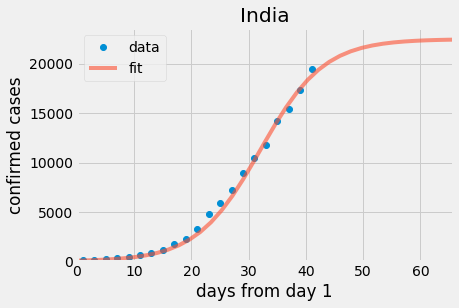

model start date: 46
model fitted max Active at: 22500
model sigmoidal coefficient is: 0.18
model curve stop steepening, start flattening by day: 32
model curve flattens by day: 64


,Date,Confirmed,Deaths,Recovered,Active,day_count,increase,rate
46,2020-03-16,119.0,2.0,13.0,104.0,1,NaN,NaN
47,2020-03-17,142.0,3.0,14.0,125.0,2,21.0,0.168000
48,2020-03-18,156.0,3.0,14.0,139.0,3,14.0,0.100719


,Date,Confirmed,Deaths,Recovered,Active,day_count,increase,rate
84,2020-04-23,23077.0,721.0,5012.0,17344.0,39,1025.0,0.059098
85,2020-04-24,24530.0,780.0,5498.0,18252.0,40,908.0,0.049748
86,2020-04-25,26283.0,825.0,5939.0,19519.0,41,1267.0,0.064911


In [34]:
est_a = 22500
est_b = 0.18
est_c = 32
x = np.linspace(-1, in_df.day_count.max()+50, 50)
y = sigmoid(x,est_a,est_b,est_c)
pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit',alpha = 0.6)
pylab.ylim(-0.05, est_a*1.05)
pylab.xlim(-0.05, est_c*2.05)
pylab.legend(loc='best')
plt.xlabel('days from day 1')
plt.ylabel('confirmed cases')
plt.title('India')
pylab.show()


print('model start date:',in_df[in_df.day_count==1].index[0])
#print('model start infection:',int(in_df[in_df.day_count==1].Active[0]))
print('model fitted max Active at:',int(est_a))
print('model sigmoidal coefficient is:',round(est_b,3))
print('model curve stop steepening, start flattening by day:',int(est_c))
print('model curve flattens by day:',int(est_c)*2)
display(in_df.head(3))
display(in_df.tail(3))

# From this, its seen that in case of India if the graph goes like that:
*  **max Active case: 22500**  ☠️
*  **curve stop steepening, start flattening by day: 32 ,which is: 15/04/2020**
*  **curve flattens by day: 64  which is: 17/05/2020**

# SEIR Model 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/SEIR.PNG/800px-SEIR.PNG)

The SEIR models the flows of people between four states: 
susceptible (S), 
exposed (E), 
infected (I), and 
resistant (R). 

Each of those variables represents the number of people in those groups. The parameters alpha and beta partially control how fast people move from being susceptible to exposed (beta), from exposed to infected (sigma), and from infected to resistant (gamma). This model has two additional parameters; one is the background mortality (mu) which is unaffected by disease-state, while the other is vaccination (nu). The vaccination moves people from the susceptible to resistant directly, without becoming exposed or infected.

The SEIR differs from the SIR model in the addition of a latency period. Individuals who are exposed (E) have had contact with an infected person, but are not themselves infectious.

Instructions:
The boxes on the right side of the page control the parameters of the model. The page should load with some parameters already in the box. Click "submit" to run the model. The parameters can all be modified and the model re-run. The parameters are
Beta	The parameter controlling how often a susceptible-infected contact results in a new exposure.
Gamma	The rate an infected recovers and moves into the resistant phase.
Sigma	The rate at which an exposed person becomes infective.
Mu	The natural mortality rate (this is unrelated to disease). This models a population of a constant size,
Initial susceptible	The number of susceptible individuals at the beginning of the model run.
Initial exposed	The number of exposed individuals at the beginning of the model run.
Initial infected	The number of infected individuals at the beginning of the model run.
Initial recovered	The number of recovered individuals at the beginning of the model run.
Days	Controls how long the model will run.
This program runs on your computer, so some computers may run faster than others. It is probably a good idea not to set the number iterations or the initial populations too high, since it will take longer to run. Note that cookies must be enabled for the algorithm to function.

![](http://www.public.asu.edu/~hnesse/classes/seireqn.png)

Details:
This is an ordinary differential equation model, described by the following equation:
derivative of S with respect to t equals
The simulation uses the fourth-order Runge-Kutta algorithm to solve it numerically, with a step size fixed at 0.01, written in JavaScript. The plotting methods are from the flot module. Both the ode simulation and the script in this page calling it are new, so there may still be some unanticipated bugs (I am also fairly new to the language, so my code may be inefficient or bizarre in places). Internet Explorer may not work since it has not yet adopted the canvas element, which is used in plotting.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from tqdm.notebook import tqdm
from scipy.integrate import solve_ivp
import numpy
import datetime
from datetime import timedelta

In [36]:
# Susceptible equation
def dS_dt(S, I, R_t, T_inf):
    return -(R_t / T_inf) * I * S

# Exposed equation
def dE_dt(S, E, I, R_t, T_inf, T_inc):
    return (R_t / T_inf) * I * S - (T_inc**-1) * E

# Infected equation
def dI_dt(I, E, T_inc, T_inf):
    return (T_inc**-1) * E - (T_inf**-1) * I

# Recovered/Remove/deceased equation
def dR_dt(I, T_inf):
    return (T_inf**-1) * I

def SEIR_model(t, y, R_t, T_inf, T_inc):
    
    if callable(R_t):
        reproduction = R_t(t)
    else:
        reproduction = R_t
        
    S, E, I, R = y
    
    S_out = dS_dt(S, I, reproduction, T_inf)
    E_out = dE_dt(S, E, I, reproduction, T_inf, T_inc)
    I_out = dI_dt(I, E, T_inc, T_inf)
    R_out = dR_dt(I, T_inf)
    
    return [S_out, E_out, I_out, R_out]

In [37]:
train = pd.read_csv('../input/covid19-global-forecasting-week-4/train.csv')
test = pd.read_csv('../input/covid19-global-forecasting-week-4/test.csv')
train['Date_datetime'] = train['Date'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d')))

In [38]:
pop_info = pd.read_csv('/kaggle/input/covid19-population-data/population_data.csv')
country_pop = pop_info.query('Type == "Country/Region"')
province_pop = pop_info.query('Type == "Province/State"')
country_lookup = dict(zip(country_pop['Name'], country_pop['Population']))
province_lookup = dict(zip(province_pop['Name'], province_pop['Population']))

In [39]:
def plot_model_and_predict(data, pop, solution, title='SEIR model'):
    sus, exp, inf, rec = solution.y
    
    f = plt.figure(figsize=(16,5))
    ax = f.add_subplot(1,2,1)
    #ax.plot(sus, 'b', label='Susceptible');
    ax.plot(exp, 'y', label='Exposed');
    ax.plot(inf, 'r', label='Infected');
    ax.plot(rec, 'c', label='Recovered/deceased');
    plt.title(title)
    plt.xlabel("Days", fontsize=10);
    plt.ylabel("Fraction of population", fontsize=10);
    plt.legend(loc='best');
    
    ax2 = f.add_subplot(1,2,2)
    preds = np.clip((inf + rec) * pop ,0,np.inf)
    ax2.plot(range(len(data)),preds[:len(data)],label = 'Predict ConfirmedCases')
    ax2.plot(range(len(data)),data['ConfirmedCases'])
    plt.title('Model predict and data')
    plt.ylabel("Population", fontsize=10);
    plt.xlabel("Days", fontsize=10);
    plt.legend(loc='best');

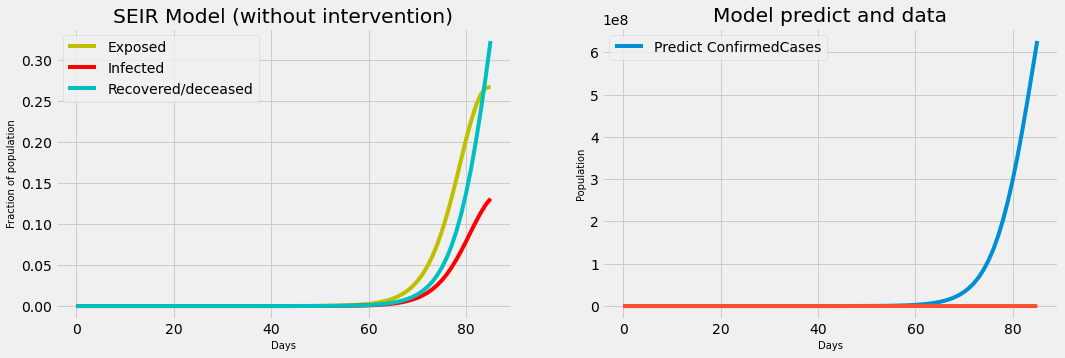

In [40]:
Country = 'India'
N = pop_info[pop_info['Name']==Country]['Population'].tolist()[0] # India Population 

# Load dataset of Hubei
train_loc = train[train['Country_Region']==Country].query('ConfirmedCases > 0')
if len(train_loc)==0:
    train_loc = train[train['Province_State']==Country].query('ConfirmedCases > 0')

n_infected = train_loc['ConfirmedCases'].iloc[0] # start from first comfirmedcase on dataset first date
max_days = len(train_loc)# how many days want to predict

# Initial stat for SEIR model
s = (N - n_infected)/ N
e = 0.
i = n_infected / N
r = 0.

# Define all variable of SEIR model 
T_inc = 5.2  # average incubation period
T_inf = 2.9 # average infectious period
R_0 = 3.954 # reproduction number

## Solve the SEIR model 
sol = solve_ivp(SEIR_model, [0, max_days], [s, e, i, r], args=(R_0, T_inf, T_inc), 
                t_eval=np.arange(max_days))

## Plot result
plot_model_and_predict(train_loc, N, sol, title = 'SEIR Model (without intervention)')


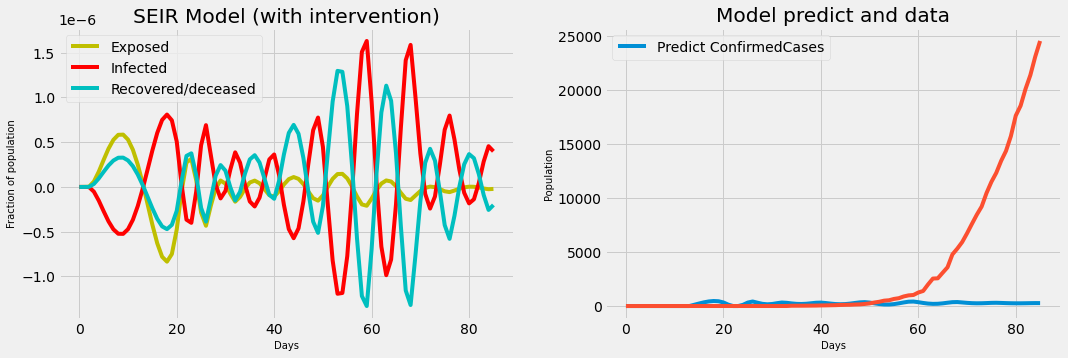

In [41]:
# Define all variable of SEIR model 
T_inc = 5.2  # average incubation period
T_inf = 2.9  # average infectious period

# Define the intervention parameters (fit result, latter will show how to fit)
R_0, cfr, k, L=[ 3.95469597 , 0.04593316 , 3.      ,   15.32328881]

def time_varying_reproduction(t): 
    return R_0 / (1 + (t/L)**k)

sol2 = solve_ivp(SEIR_model, [0, max_days], [s, e, i, r], args=(time_varying_reproduction, T_inf, T_inc), 
                t_eval=np.arange(max_days))

plot_model_and_predict(train_loc, N, sol2, title = 'SEIR Model (with intervention)')

In [42]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [43]:
def cumsum_signal(vec):
    temp_val = 0
    vec_new = []
    for i in vec:
        if i > temp_val:
            vec_new.append(i)
            temp_val = i
        else:
            vec_new.append(temp_val)
    return vec_new


In [44]:
# Use a constant reproduction number
def eval_model_const(params, data, population, return_solution=False, forecast_days=0):
    R_0, cfr = params # Paramaters, R0 and cfr 
    N = population # Population of each country
    n_infected = data['ConfirmedCases'].iloc[0] # start from first comfirmedcase on dataset first date
    max_days = len(data) + forecast_days # How many days want to predict
    s, e, i, r = (N - n_infected)/ N, 0, n_infected / N, 0 #Initial stat for SEIR model
    
    # R0 become half after intervention days
    def time_varying_reproduction(t):
        if t > 80: # we set intervention days = 80
            return R_0 * 0.5
        else:
            return R_0
    
    # Solve the SEIR differential equation.
    sol = solve_ivp(SEIR_model, [0, max_days], [s, e, i, r], args=(time_varying_reproduction, T_inf, T_inc),
                    t_eval=np.arange(0, max_days))
    
    sus, exp, inf, rec = sol.y
    # Predict confirmedcase
    y_pred_cases = np.clip((inf + rec) * N ,0,np.inf)
    y_true_cases = data['ConfirmedCases'].values
    
    # Predict Fatalities by remove * fatality rate(cfr)
    y_pred_fat = np.clip(rec*N* cfr, 0, np.inf)
    y_true_fat = data['Fatalities'].values
    
    optim_days = min(20, len(data))  # Days to optimise for
    weights = 1 / np.arange(1, optim_days+1)[::-1]  # Recent data is more heavily weighted
    
    # using mean squre log error to evaluate
    msle_cases = mean_squared_log_error(y_true_cases[-optim_days:], y_pred_cases[-optim_days:], weights)
    msle_fat = mean_squared_log_error(y_true_fat[-optim_days:], y_pred_fat[-optim_days:], weights)
    msle_final = np.mean([msle_cases, msle_fat])
    
    if return_solution:
        return msle_final, sol
    else:
        return msle_final


In [45]:
# Use a Hill decayed reproduction number
def eval_model_decay(params, data, population, return_solution=False, forecast_days=0):
    R_0, cfr, k, L = params # Paramaters, R0 and cfr 
    N = population # Population of each country
    n_infected = data['ConfirmedCases'].iloc[0] # start from first comfirmedcase on dataset first date
    max_days = len(data) + forecast_days # How many days want to predict
    s, e, i, r = (N - n_infected)/ N, 0, n_infected / N, 0 #Initial stat for SEIR model
    
    # https://github.com/SwissTPH/openmalaria/wiki/ModelDecayFunctions   
    # Hill decay. Initial values: R_0=2.2, k=2, L=50
    def time_varying_reproduction(t): 
        return R_0 / (1 + (t/L)**k)
    
    # Solve the SEIR differential equation.
    sol = solve_ivp(SEIR_model, [0, max_days], [s, e, i, r], args=(time_varying_reproduction, T_inf, T_inc),
                    t_eval=np.arange(0, max_days))
    
    sus, exp, inf, rec = sol.y
    # Predict confirmedcase
    y_pred_cases = np.clip((inf + rec) * N ,0,np.inf)
    y_true_cases = data['ConfirmedCases'].values
    
    # Predict Fatalities by remove * fatality rate(cfr)
    y_pred_fat = np.clip(rec*N* cfr, 0, np.inf)
    y_true_fat = data['Fatalities'].values
    
    optim_days = min(20, len(data))  # Days to optimise for
    weights = 1 / np.arange(1, optim_days+1)[::-1]  # Recent data is more heavily weighted
    
    # using mean squre log error to evaluate
    msle_cases = mean_squared_log_error(y_true_cases[-optim_days:], y_pred_cases[-optim_days:], weights)
    msle_fat = mean_squared_log_error(y_true_fat[-optim_days:], y_pred_fat[-optim_days:], weights)
    msle_final = np.mean([msle_cases, msle_fat])
    
    if return_solution:
        return msle_final, sol
    else:
        return msle_final



In [46]:
len(train[-7:]),len(train[:-7]),len(train)

(7, 29415, 29422)

In [47]:
import plotly.express as px
from matplotlib import dates
import plotly.graph_objects as go

def fit_model_new(data, area_name, initial_guess=[2.2, 0.02, 2, 50], 
              bounds=((1, 20), (0, 0.15), (1, 3), (1, 100)), make_plot=True, decay_mode = None):
    
    if area_name in ['France']:# France last data looks weird, remove it
        train = data.query('ConfirmedCases > 0').copy()[:-1]
    #elif area_name in ['Virgin Islands']:
    #    train = data[:-3].query('ConfirmedCases > 0').copy()
    else:
        train = data.query('ConfirmedCases > 0').copy()
    
    ####### Split Train & Valid #######
    #valid_data = train[-1:]
    train_data = train
    
    ####### If this country have no ConfirmedCase, return 0 #######
    if len(train_data) == 0:
        result_zero = np.zeros((43))
        return pd.DataFrame({'ConfirmedCases':result_zero,'Fatalities':result_zero}), 0 
    
    ####### Load the population of area #######
    try:
        #population = province_lookup[area_name]
        population = pop_info[pop_info['Name']==area_name]['Population'].tolist()[0]
    except IndexError:
        print ('country not in population set, '+str(area_name))
        population = 1000000 
    
    
    if area_name == 'US':
        population = 327200000
    if area_name == 'Global':
        population = 7744240900
        
    cases_per_million = train_data['ConfirmedCases'].max() * 10**6 / population
    n_infected = train_data['ConfirmedCases'].iloc[0]
    
    ####### Total case/popuplation below 1, reduce country population #######
    if cases_per_million < 1:
        #print ('reduce pop divide by 100')
        population = population/100
        
    ####### Fit the real data by minimize the MSLE #######
    res_const = minimize(eval_model_const, [2.2, 0.02], bounds=((1, 20), (0, 0.15)),
                         args=(train_data, population, False),
                         method='L-BFGS-B')

    res_decay = minimize(eval_model_decay, initial_guess, bounds=bounds,
                         args=(train_data, population, False),
                         method='L-BFGS-B')
    
    ####### Align the date information #######
    test_end = datetime.datetime.strptime('2020-05-07','%Y-%m-%d')
    test_start = datetime.datetime.strptime('2020-03-26','%Y-%m-%d')
    train_test = data[data.Date_datetime>=test_start]
    test_period = (test_end - test_start).days
    train_max = train_data.Date_datetime.max()
    train_min = train_data.Date_datetime.min()
    add_date = 0
    delta_days =(test_end - train_max).days
    train_add_time=[]

    if train_min > test_start:
        add_date = (train_min-test_start).days
        last = train_min-timedelta(add_date)
        train_add_time = np.arange(last, train_min, dtype='datetime64[D]').tolist()
        train_add_time = pd.to_datetime(train_add_time)
        dates_all = train_add_time.append(pd.to_datetime(np.arange(train_min, test_end+timedelta(1), dtype='datetime64[D]')))
    else:
        dates_all = pd.to_datetime(np.arange(train_min, test_end+timedelta(1), dtype='datetime64[D]'))


    ####### Auto find the best decay function ####### 
    if decay_mode is None:
        if res_const.fun < res_decay.fun :
            msle, sol = eval_model_const(res_const.x, train_data, population, True, delta_days+add_date)
            res = res_const

        else:
            msle, sol = eval_model_decay(res_decay.x, train_data, population, True, delta_days+add_date)
            res = res_decay
            R_0, cfr, k, L = res.x
    else:
        if decay_mode =='day_decay':
            msle, sol = eval_model_const(res_const.x, train_data, population, True, delta_days+add_date)
            res = res_const
        else:
            msle, sol = eval_model_decay(res_decay.x, train_data, population, True, delta_days+add_date)
            res = res_decay
            R_0, cfr, k, L = res.x

    ####### Predict the result by using best fit paramater of SEIR model ####### 
    sus, exp, inf, rec = sol.y
    
    y_pred = pd.DataFrame({
        'ConfirmedCases': cumsum_signal(np.diff((inf + rec) * population, prepend=n_infected).cumsum()),
       # 'ConfirmedCases': [inf[0]*population for i in range(add_date)]+(np.clip((inf + rec) * population,0,np.inf)).tolist(),
       # 'Fatalities': [rec[0]*population for i in range(add_date)]+(np.clip(rec, 0, np.inf) * population * res.x[1]).tolist()
        'Fatalities': cumsum_signal((np.clip(rec * population * res.x[1], 0, np.inf)).tolist())
    })

    #y_pred_valid = y_pred.iloc[len(train_data):len(train_data)+len(valid_data)]
    y_pred_valid = y_pred.iloc[:len(train_data)]
    y_pred_test = pd.concat([train_test[['ConfirmedCases', 'Fatalities']],y_pred.iloc[-(delta_days):]], ignore_index=True)
    y_true_valid = train_data[['ConfirmedCases', 'Fatalities']]
    #y_true_valid = valid_data[['ConfirmedCases', 'Fatalities']]
    #print (len(y_pred),train_min)
    
    ####### Calculate MSLE ####### 
    valid_msle_cases = mean_squared_log_error(y_true_valid['ConfirmedCases'], y_pred_valid['ConfirmedCases'])
    valid_msle_fat = mean_squared_log_error(y_true_valid['Fatalities'], y_pred_valid['Fatalities'])
    valid_msle = np.mean([valid_msle_cases, valid_msle_fat])
    
    ####### Plot the fit result of train data and forecast after 300 days ####### 
    if make_plot:
        if len(res.x)<=2:
            print(f'Validation MSLE: {valid_msle:0.5f}, using intervention days decay, Reproduction number(R0) : {res.x[0]:0.5f}, Fatal rate : {res.x[1]:0.5f}')
        else:
            print(f'Validation MSLE: {valid_msle:0.5f}, using Hill decay, Reproduction number(R0) : {res.x[0]:0.5f}, Fatal rate : {res.x[1]:0.5f}, K : {res.x[2]:0.5f}, L: {res.x[3]:0.5f}')
        
        ####### Plot the fit result of train data dna SEIR model trends #######

        f = plt.figure(figsize=(16,5))
        ax = f.add_subplot(1,2,1)
        ax.plot(exp, 'y', label='Exposed');
        ax.plot(inf, 'r', label='Infected');
        ax.plot(rec, 'c', label='Recovered/deceased');
        plt.title('SEIR Model Trends')
        plt.xlabel("Days", fontsize=10);
        plt.ylabel("Fraction of population", fontsize=10);
        plt.legend(loc='best');
        #train_date_remove_year = train_data['Date_datetime'].apply(lambda date:'{:%m-%d}'.format(date))
        ax2 = f.add_subplot(1,2,2)
        xaxis = train_data['Date_datetime'].tolist()
        xaxis = dates.date2num(xaxis)
        hfmt = dates.DateFormatter('%m\n%d')
        ax2.xaxis.set_major_formatter(hfmt)
        ax2.plot(np.array(train_data['Date_datetime'], dtype='datetime64[D]'),train_data['ConfirmedCases'],label='Confirmed Cases (train)', c='g')
        ax2.plot(np.array(train_data['Date_datetime'], dtype='datetime64[D]'), y_pred['ConfirmedCases'][:len(train_data)],label='Cumulative modeled infections', c='r')
        #ax2.plot(np.array(valid_data['Date_datetime'], dtype='datetime64[D]'), y_true_valid['ConfirmedCases'],label='Confirmed Cases (valid)', c='b')
        #ax2.plot(np.array(valid_data['Date_datetime'], dtype='datetime64[D]'),y_pred_valid['ConfirmedCases'],label='Cumulative modeled infections (valid)', c='y')
        plt.title('Real ConfirmedCase and Predict ConfirmedCase')
        plt.legend(loc='best');
        plt.show()
            
        ####### Forecast 300 days after by using the best paramater of train data #######
        if len(res.x)>2:
            msle, sol = eval_model_decay(res.x, train_data, population, True, 300)
        else:
            msle, sol = eval_model_const(res.x, train_data, population, True, 300)
        
        sus, exp, inf, rec = sol.y
        
        y_pred = pd.DataFrame({
            'ConfirmedCases': cumsum_signal(np.diff((inf + rec) * population, prepend=n_infected).cumsum()),
            'Fatalities': cumsum_signal(np.clip(rec, 0, np.inf) * population * res.x[1])
        })
        
        ####### Plot 300 days after of each country #######
        start = train_min
        end = start + timedelta(len(y_pred))
        time_array = np.arange(start, end, dtype='datetime64[D]')

        max_day = numpy.where(inf == numpy.amax(inf))[0][0]
        where_time = time_array[max_day]
        pred_max_day = y_pred['ConfirmedCases'][max_day]
        xy_show_max_estimation = (where_time, max_day)
        
        con = y_pred['ConfirmedCases']
        fat = y_pred['Fatalities']
        max_day_con = numpy.where(con == numpy.amax(con))[0][0] # Find the max confimed case of each country
        max_day_fat = numpy.where(fat == numpy.amax(fat))[0][0]
        max_con = numpy.amax(con)
        max_fat = numpy.amax(fat)
        where_time_con = time_array[len(time_array)-50]
        xy_show_max_estimation_confirmed = (where_time_con, max_con)
        
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=time_array, y=y_pred['ConfirmedCases'].astype(int),
                            mode='lines',
                            line = dict(color='red'),
                            name='Estimation Confirmed Case Start from '+ str(start.date())+ ' to ' +str(end.date())))
        fig.add_trace(go.Scatter(x=time_array, y=y_pred['Fatalities'].astype(int),
                            mode='lines',
                            line = dict(color='yellow'),
                            name='Estimation Fatalities Start from '+ str(start.date())+ ' to ' +str(end.date())))
        fig.add_trace(go.Scatter(x=time_array[:len(train)], y=train['ConfirmedCases'],
                            mode='lines',
                            name='Confirmed case until '+ str(train_max.date()),line = dict(color='green', width=4)))
        fig.add_trace(go.Scatter(x=time_array[:len(train)], y=train['Fatalities'],
                            mode='lines',
                            name='Fatalities case until '+ str(train_max.date()),line = dict(color='blue', width=4)))
        fig.add_annotation(
            x=where_time_con,
            y=max_con-(max_con/30),
            showarrow=False,
            text="Estimate Max Case around:" +str(int(max_con)),
            font=dict(
                color="Blue",
                size=15
            ))
        fig.add_annotation(
            x=where_time_con,
            y=max_fat-(max_fat/30),
            showarrow=False,
            text="Estimate Max death around:" +str(int(max_fat)),
            font=dict(
                color="Blue",
                size=15
            ))
        fig.add_annotation(
            x=time_array[len(train)-1],
            y=train['ConfirmedCases'].tolist()[-1],
            showarrow=True,
            text=f"Real Max ConfirmedCase: " +str(int(train['ConfirmedCases'].tolist()[-1]))) 
        
        fig.add_annotation(
            x=time_array[len(train)-1],
            y=train['Fatalities'].tolist()[-1],
            showarrow=True,
            text=f"Real Max Fatalities: " +str(int(train['Fatalities'].tolist()[-1]))) 
        
        fig.add_annotation(
            x=where_time,
            y=pred_max_day,
            text='Infect start decrease from: ' + str(where_time))   
        fig.update_layout(title='Estimate Confirmed Case ,'+area_name+' Total population ='+ str(int(population)), legend_orientation="h")
        fig.show()
        ###
        df = pd.DataFrame({'Values': train_data['ConfirmedCases'].tolist()+y_pred['ConfirmedCases'].tolist(),'Date_datatime':time_array[:len(train_data)].tolist()+time_array.tolist(),
                   'Real/Predict': ['ConfirmedCase' for i in range(len(train_data))]+['PredictCase' for i in range(len(y_pred))]})
        fig = px.line(df, x="Date_datatime", y="Values",color = 'Real/Predict')
        fig.show()
        plt.figure(figsize = (16,7))
        plt.plot(time_array[:len(train_data)],train_data['ConfirmedCases'],label='Confirmed case until '+ str(train_max.date()),color='g', linewidth=3.0)
        plt.plot(time_array,y_pred['ConfirmedCases'],label='Estimation Confirmed Case Start from '+ str(start.date())+ ' to ' +str(end.date()),color='r', linewidth=1.0)
        plt.annotate('Infect start decrease from: ' + str(where_time), xy=xy_show_max_estimation, size=15, color="black")
        plt.annotate('max Confirmedcase: ' + str(int(max_con)), xy=xy_show_max_estimation_confirmed, size=15, color="black")
        plt.title('Estimate Confirmed Case '+area_name+' Total population ='+ str(int(population)))
        plt.legend(loc='lower right')
        plt.show()


    return y_pred_test, valid_msle

Validation MSLE: 6.39405, using Hill decay, Reproduction number(R0) : 2.79140, Fatal rate : 0.03952, K : 1.00000, L: 100.00000


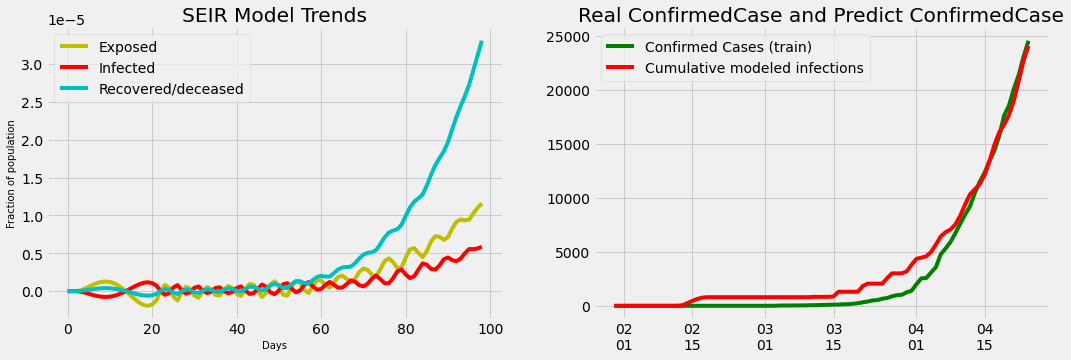

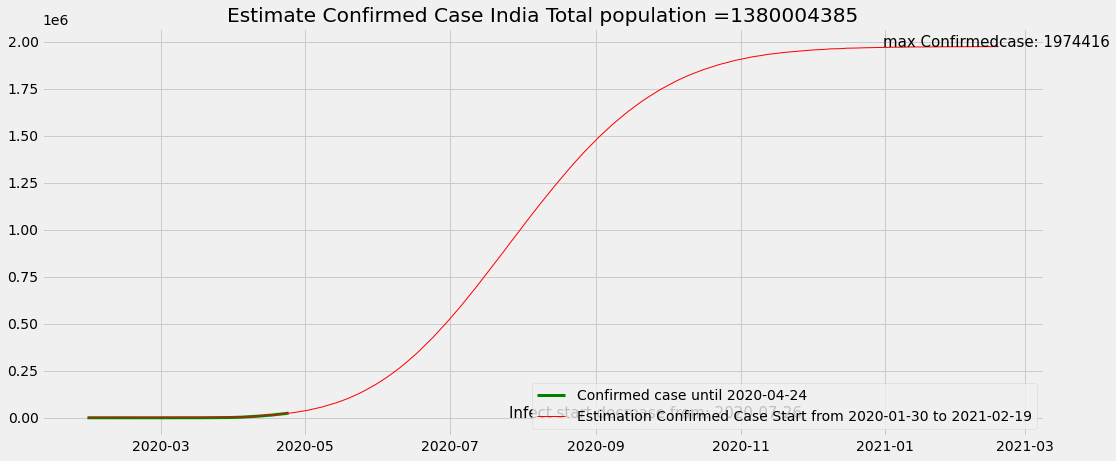

In [48]:
country = 'India'
if country not in train['Country_Region'].unique():
    country_pd_train = train[train['Province_State']==country]
else:
    country_pd_train = train[train['Country_Region']==country]

a,b = fit_model_new(country_pd_train,country,make_plot=True)

# LSTM Model 

In [49]:
import pandas as pd
import numpy as np

In [50]:
train_df = pd.read_csv("/kaggle/input/covid19-global-forecasting-week-4/train.csv")
test_df = pd.read_csv("/kaggle/input/covid19-global-forecasting-week-4/test.csv")

In [51]:
train_df.apply(lambda col: col.isnull().value_counts(), axis=0)
test_df.apply(lambda col: col.isna().value_counts(), axis=0)

,ForecastId,Province_State,Country_Region,Date
False,13459.0,5719,13459.0,13459.0
True,NaN,7740,NaN,NaN


In [52]:
train_df["Province_State"] = train_df["Province_State"].fillna("")
test_df["Province_State"] = test_df["Province_State"].fillna("")

In [53]:
train_df["Date"] = pd.to_datetime(train_df["Date"])
test_df["Date"] = pd.to_datetime(test_df["Date"])

In [54]:
train_df["NewCases"] = train_df.groupby(["Country_Region", "Province_State"])["ConfirmedCases"].diff(periods=1)
train_df["NewCases"] = train_df["NewCases"].fillna(0)
train_df["NewCases"] = np.where(train_df["NewCases"] < 0, 0, train_df["NewCases"])
train_df["NewFatalities"] = train_df.groupby(["Country_Region", "Province_State"])["Fatalities"].diff(periods=1)
train_df["NewFatalities"] = train_df["NewFatalities"].fillna(0)
train_df["NewFatalities"] = np.where(train_df["NewFatalities"] < 0, 0, train_df["NewFatalities"])

In [55]:
train_df["NewCases"] = np.log(train_df["NewCases"] + 1)
train_df["NewFatalities"] = np.log(train_df["NewFatalities"] + 1)

In [56]:
def preprocess_train(n_prev, n_next):
    df = train_df.copy()
    input_feats, output_feats = [], []
    for i in range(1, n_prev+1):
        for feat in ["NewCases", "NewFatalities"]:
            df["{}_prev_{}".format(feat, i)] = df.groupby(["Country_Region", "Province_State"])[feat].shift(i)
            input_feats.append("{}_prev_{}".format(feat, i))
    
    output_feats.extend(["NewCases", "NewFatalities"])
    for i in range(1, n_next):
        for feat in ["NewCases", "NewFatalities"]:
            df["{}_next_{}".format(feat, i)] = df.groupby(["Country_Region", "Province_State"])[feat].shift(-i)
            output_feats.append("{}_next_{}".format(feat, i))
    df.dropna(inplace=True)       
            
    const_df = pd.get_dummies(df[["Province_State", "Country_Region"]], drop_first=True)
    time_df = df[input_feats]
    time_df = time_df.values.reshape((df.shape[0],-1,2))
    output_df = df[output_feats]
    return const_df, time_df, output_df

def preprocess_test(n_prev):
    input_feats = []
    append_df = pd.concat([train_df, test_df[test_df["Date"] == train_df["Date"].max() + timedelta(days=1)]])
    append_df.sort_values(["Country_Region", "Province_State", "Date"], ascending=[True, True, True], inplace=True)
    for i in range(1, n_prev+1):
        for feat in ["NewCases", "NewFatalities"]:
            append_df["{}_prev_{}".format(feat, i)] = append_df.groupby(["Country_Region", "Province_State"])[feat].shift(i)
            input_feats.append("{}_prev_{}".format(feat, i))
    append_df = append_df[append_df["ForecastId"].notnull()]
            
    const_df = pd.get_dummies(append_df[["Province_State", "Country_Region"]], drop_first=True)
    time_df = append_df[input_feats]
    time_df = time_df.values.reshape((append_df.shape[0],-1,2))
    return const_df, time_df

In [57]:
n_next = (test_df["Date"].max() - train_df["Date"].max()).days

In [58]:
from datetime import timedelta
const_df, time_df, output_df = preprocess_train(n_next, n_next)
const_test_df, time_test_df = preprocess_test(n_next)

In [59]:
from keras.models import Model
from keras import layers
from keras import Input

Using TensorFlow backend.


In [60]:
from keras import optimizers
time_input = Input(shape=(time_df.shape[1], time_df.shape[2]))
lstm = layers.LSTM(128)(time_input)

const_input = Input(shape=(const_df.shape[1],))

combine = layers.concatenate([lstm, const_input], axis=-1)
#lstm_out = layers.Dropout(0.1)(combine)
output = layers.Dense(output_df.shape[1], activation='softmax')(combine)

model = Model([time_input, const_input], output)
#optimizer=optimizers.SGD(lr=0.01, nesterov=True)
model.compile(optimizer='adam',
              loss='mean_squared_error',metrics=['acc'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 20, 2)        0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 128)          67072       input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 316)          0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 444)          0           lstm_1[0][0]                     
                                                                 input_2[0][0]              

In [61]:
model.fit([time_df, const_df], output_df, epochs=50, batch_size=128)

Epoch 1/50
17215/17215 [==============================] - 5s 264us/step - loss: 3.9710 - acc: 0.1151
Epoch 2/50
17215/17215 [==============================] - 3s 202us/step - loss: 3.9658 - acc: 0.1309
Epoch 3/50
17215/17215 [==============================] - 3s 173us/step - loss: 3.9656 - acc: 0.1360
Epoch 4/50
17215/17215 [==============================] - 3s 167us/step - loss: 3.9656 - acc: 0.1367
Epoch 5/50
17215/17215 [==============================] - 3s 170us/step - loss: 3.9655 - acc: 0.1381
Epoch 6/50
17215/17215 [==============================] - 3s 165us/step - loss: 3.9653 - acc: 0.1373
Epoch 7/50
17215/17215 [==============================] - 3s 162us/step - loss: 3.9650 - acc: 0.1350
Epoch 8/50
17215/17215 [==============================] - 3s 170us/step - loss: 3.9649 - acc: 0.1359
Epoch 9/50
17215/17215 [==============================] - 3s 166us/step - loss: 3.9649 - acc: 0.1320
Epoch 10/50
17215/17215 [==============================] - 3s 166us/step - loss: 3.9648 - a

In [62]:
output = model.predict([time_test_df, const_test_df])
output.shape

(313, 40)

In [63]:
sub_test_df = test_df[test_df["Date"] > train_df["Date"].max()]
sub_test_df = pd.concat([sub_test_df,
                         pd.DataFrame(output.reshape((-1, 2)), columns=["NewCases", "NewFatalities"], index=sub_test_df.index)],
                         axis=1)
sub_test_df["NewCases"] = np.exp(sub_test_df["NewCases"]) - 1
sub_test_df["NewFatalities"] = np.exp(sub_test_df["NewFatalities"]) - 1
sub_test_df

,ForecastId,Province_State,Country_Region,Date,NewCases,NewFatalities
23,24,,Afghanistan,2020-04-25,0.083372,0.000009
24,25,,Afghanistan,2020-04-26,0.076739,0.000010
25,26,,Afghanistan,2020-04-27,0.083736,0.000009
26,27,,Afghanistan,2020-04-28,0.074137,0.000010
27,28,,Afghanistan,2020-04-29,0.093296,0.000008
...,...,...,...,...,...,...
13454,13455,,Zimbabwe,2020-05-10,0.119899,0.000000
13455,13456,,Zimbabwe,2020-05-11,0.159656,0.000000
13456,13457,,Zimbabwe,2020-05-12,0.187937,0.000000
13457,13458,,Zimbabwe,2020-05-13,0.233449,0.000000


In [64]:
fixed_test_df = test_df[test_df["Date"] <= train_df["Date"].max()].merge(train_df[train_df["Date"] >= test_df["Date"].min()][["Province_State","Country_Region", "Date", "ConfirmedCases", "Fatalities"]],
                                                                         how="left", on=["Province_State","Country_Region", "Date"])
fixed_test_df

,ForecastId,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,,Afghanistan,2020-04-02,273.0,6.0
1,2,,Afghanistan,2020-04-03,281.0,6.0
2,3,,Afghanistan,2020-04-04,299.0,7.0
3,4,,Afghanistan,2020-04-05,349.0,7.0
4,5,,Afghanistan,2020-04-06,367.0,11.0
...,...,...,...,...,...,...
7194,13435,,Zimbabwe,2020-04-20,25.0,3.0
7195,13436,,Zimbabwe,2020-04-21,28.0,3.0
7196,13437,,Zimbabwe,2020-04-22,28.0,4.0
7197,13438,,Zimbabwe,2020-04-23,28.0,4.0


In [65]:
predict_df = pd.concat([sub_test_df, fixed_test_df]).sort_values(["Country_Region", "Province_State", "Date"],
                                                                 ascending=[True, True, True])
predict_df

,ConfirmedCases,Country_Region,Date,Fatalities,ForecastId,NewCases,NewFatalities,Province_State
0,273.0,Afghanistan,2020-04-02,6.0,1,NaN,NaN,
1,281.0,Afghanistan,2020-04-03,6.0,2,NaN,NaN,
2,299.0,Afghanistan,2020-04-04,7.0,3,NaN,NaN,
3,349.0,Afghanistan,2020-04-05,7.0,4,NaN,NaN,
4,367.0,Afghanistan,2020-04-06,11.0,5,NaN,NaN,
...,...,...,...,...,...,...,...,...
13454,NaN,Zimbabwe,2020-05-10,NaN,13455,0.119899,0.0,
13455,NaN,Zimbabwe,2020-05-11,NaN,13456,0.159656,0.0,
13456,NaN,Zimbabwe,2020-05-12,NaN,13457,0.187937,0.0,
13457,NaN,Zimbabwe,2020-05-13,NaN,13458,0.233449,0.0,


In [66]:
predict_df = predict_df.reset_index()
for i in range(len(predict_df)):
    if pd.isnull(predict_df.iloc[i]["ConfirmedCases"]):
        predict_df.loc[i, "ConfirmedCases"] = predict_df.iloc[i - 1]["ConfirmedCases"] + predict_df.iloc[i]["NewCases"]
    if pd.isnull(predict_df.iloc[i]["Fatalities"]):
        predict_df.loc[i, "Fatalities"] = predict_df.iloc[i - 1]["Fatalities"] + predict_df.iloc[i]["NewFatalities"]
predict_df

,index,ConfirmedCases,Country_Region,Date,Fatalities,ForecastId,NewCases,NewFatalities,Province_State
0,0,273.000000,Afghanistan,2020-04-02,6.0,1,NaN,NaN,
1,1,281.000000,Afghanistan,2020-04-03,6.0,2,NaN,NaN,
2,2,299.000000,Afghanistan,2020-04-04,7.0,3,NaN,NaN,
3,3,349.000000,Afghanistan,2020-04-05,7.0,4,NaN,NaN,
4,4,367.000000,Afghanistan,2020-04-06,11.0,5,NaN,NaN,
...,...,...,...,...,...,...,...,...,...
13454,13454,29.221281,Zimbabwe,2020-05-10,4.0,13455,0.119899,0.0,
13455,13455,29.380936,Zimbabwe,2020-05-11,4.0,13456,0.159656,0.0,
13456,13456,29.568873,Zimbabwe,2020-05-12,4.0,13457,0.187937,0.0,
13457,13457,29.802323,Zimbabwe,2020-05-13,4.0,13458,0.233449,0.0,


In [67]:
assert predict_df.shape[0] == test_df.shape[0]

In [68]:
predict_df[["ForecastId", "ConfirmedCases", "Fatalities"]].to_csv("submission.csv", index=False)

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

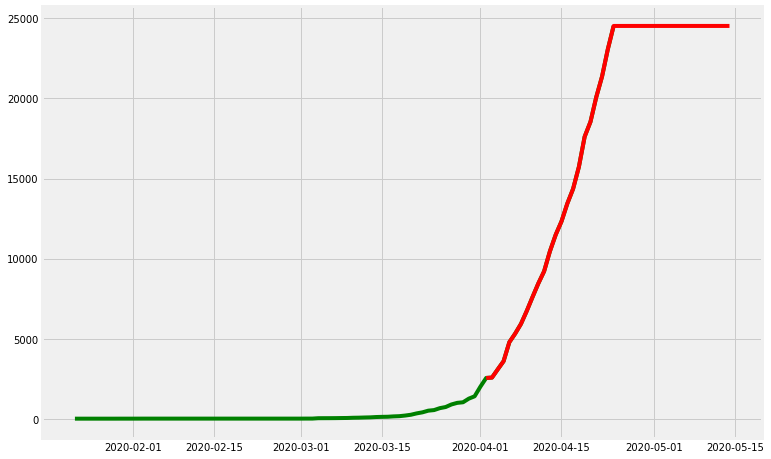

In [70]:
country = "India"

target = "ConfirmedCases"
region_train_df = train_df[(train_df["Country_Region"]==country)]
region_predict_df = predict_df[(predict_df["Country_Region"]==country)]

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_axes([0, 0, 1, 1])

fig = px.line(region_train_df, x="Date", y=target, title='Prediction in India')
fig = px.line(region_predict_df, x="Date", y=target, title='Prediction in India')
fig.show()

ax1.plot(region_train_df["Date"],
         region_train_df[target],
         color="green")

ax1.plot(region_predict_df["Date"],
         region_predict_df[target],
         color="red")
plt.show()



# Conclusion:

* 'Sigmoid model to predict covid-19' is working fine in this time hope that would be the worst case scenario






![](https://thumbs.dreamstime.com/b/stop-covid-stay-home-stay-safe-stay-home-stay-safe-stop-covid-stop-coronavirus-176141330.jpg)

# Hope you guys find this notebook useful. 
# If you like this notebook, please upvote.***👍 
# Thanks in advance**